In [86]:
#pip install google_images_download

In [138]:
# importing google_images_download module 
from google_images_download import google_images_download
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os
import pandas as pd
from PIL import Image
import os, os.path

path_string = "D:/Githubrepos/DS-Unit-4-Sprint-2-Neural-Networks/downloads/"

class GoogleImage_to_Labeled_Df(object):
      
    def __init__(self, list_of_labels, limit, path_string, size_string="medium", response = google_images_download.googleimagesdownload()):
        self.search_queries = list_of_labels
        self.size_string = size_string
        self.limit = limit
        self.path_string = path_string
        self.response = response
    
        
    def downloadimages(self, query): 
        # keywords is the search query 
        # format is the image file format 
        # limit is the number of images to be downloaded 
        # print urs is to print the image file url 
        # size is the image size which can 
        # be specified manually ("large, medium, icon") 
        # aspect ratio denotes the height width ratio 
        # of images to download. ("tall, square, wide, panoramic")
        # no_numbering if removed will enumerate the files but with a . after and break the class
        #chromedriver must be the path to your driver to get over 100 pictures
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":self.limit, 
                     "print_urls":False, 
                     "size": self.size_string, 
                     "aspect_ratio": "square",
                     "no_numbering":"-nn",
                     "chromedriver": "C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe"} 
        try: 
            self.response.download(arguments) 

        # Handling File NotFound Error     
        except FileNotFoundError:  
            arguments = {"keywords": query, 
                         "format": "jpg", 
                         "limit":self.limit, 
                         "print_urls":False,  
                         "size": self.size_string} 

            # Providing arguments for the searched query 
            try: 
                # Downloading the photos based 
                # on the given arguments 
                response.download(arguments)  
            except: 
                pass
    
    def rename_files(self, filename_string, path):
        #renames the files with the correc labels

        i = 0

        for filename in os.listdir(path): 
            dst = filename_string + str(i) + ".jpg"
            src = path + filename 
            dst = path + dst 

            # rename() function will 
            # rename all the files 
            os.rename(src, dst) 
            i += 1
            
    def rename_loop(self):
        imgs = []
        self.df = pd.DataFrame({'image_arrays' : [], 'label' : []})
        valid_images = [".jpg"]
            #loop through queries and paths to apply rename
        for i in range(len(self.search_queries)):
            self.paths = []
            self.paths.append(self.path_string + self.search_queries[i] + "/")
            for p in self.paths:
                    self.rename_files(self.search_queries[i], p)
                        
                        
    def get_images(self):
        # Driver Code 
        for query in self.search_queries: 
            self.downloadimages(query)  
            print()
            
    def make_df(self):
    
        self.df = pd.DataFrame({'image_arrays' : [], 'label' : []})
        valid_images = [".jpg","."]
        invalid_imgs = 0
        for i in range(len(self.search_queries)):
            for f in os.listdir(self.path_string + self.search_queries[i]):
                try:
                    imgs = []
                    ext = os.path.splitext(f)[1]
                    if ext.lower() not in valid_images:
                        continue
                    imgs.append(Image.open(self.path_string + self.search_queries[i] + "/" + f))
                    for ims in imgs:
                        x = np.array(ims)
                        self.df = self.df.append({'image_arrays' : x, 'label': self.search_queries[i]} , ignore_index=True)
                except OSError:
                    invalid_imgs +=1
                    continue
        
        print(f"Labeled DataFrame Complete with {self.df.shape[0]} rows and {self.df.shape[1]} columns")
        print(f"There were {invalid_imgs}, shit images")
        return self.df.label.value_counts(), self.df.head()
    
    def show_image(self,row_number):
        #takes in a row number and saves/returns the picture from the np.array row
        self.img = Image.fromarray(self.df.iloc[row_number][0])
        self.img.save(f"output{row_number}_{str(self.df.label[row_number])}.png")

        plt.imshow(self.img)
        plt.show()
        
  

In [139]:
pandas_pythons = GoogleImage_to_Labeled_Df(["panda","python"], 10, path_string)

In [140]:
pandas_pythons.get_images()
pandas_pythons.rename_loop()


Item no.: 1 --> Item name = panda
Evaluating...
Starting Download...
Completed Image ====> 1.61J8UP8pySL._SX425_.jpg
Completed Image ====> 2.0710188_PE727391_S5.JPG
Completed Image ====> 3.Fantong+Giant+Panda+Bear+Statue.jpg
Completed Image ====> 4.71GKX1Q9kaL._SX425_.jpg
Completed Image ====> 5.pairs-Panda-plush-z1.jpg
Completed Image ====> 6.Panda-plush-z2.jpg
Completed Image ====> 7.277-700x700.jpg
Completed Image ====> 8.panda-simulation-plush-toys-panda-sleeping-animal-dolls.jpg
Wrong image format returned. Skipping...
Wrong image format returned. Skipping...
Completed Image ====> 9.14734_main_v15_tp.jpg
Completed Image ====> 10.FA-A56549-2.jpg

Errors: 2



Item no.: 1 --> Item name = python
Evaluating...
Starting Download...
Wrong image format returned. Skipping...
Completed Image ====> 1.python_open_mouth_breathing.jpg
Completed Image ====> 2.stream_img.jpg
Completed Image ====> 3.reticulatedpythonsmall.jpg
Completed Image ====> 4.pythonlogo1200x_480x480.jpg
Completed Image ==

In [141]:
pandas_pythons.make_df()

Labeled DataFrame Complete with 19 rows and 2 columns
There were 1, shit images


(python    10
 panda      9
 Name: label, dtype: int64,
                                         image_arrays  label
 0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  panda
 1  [[[255, 255, 255], [255, 255, 255], [255, 255,...  panda
 2  [[[255, 255, 255], [255, 255, 255], [255, 255,...  panda
 3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  panda
 4  [[[253, 253, 253], [254, 254, 254], [254, 254,...  panda)

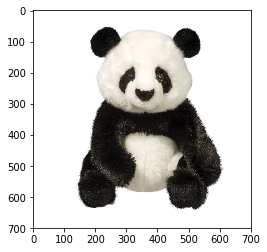

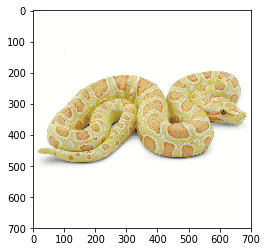

In [145]:
pandas_pythons.show_image(1)
pandas_pythons.show_image(9)
